# example: collect data from google trends.

In [1]:
from pytrends.request import TrendReq

In [2]:
pytrends = TrendReq(hl='en-US', tz=360)

Up to 5 keywords allowed per request?

from pytrends documentation

Current Time Minus Time Pattern:

By Month: 'today #-m' where # is the number of months from that date to pull data for

For example: 'today 3-m' would get data from today to 3months ago

NOTE Google uses UTC date as 'today'
Seems to only work for 1, 2, 3 months only

Daily: 'now #-d' where # is the number of days from that date to pull data for

For example: 'now 7-d' would get data from the last week
Seems to only work for 1, 7 days only

Hourly: 'now #-H' where # is the number of hours from that date to pull data for

For example: 'now 1-H' would get data from the last hour
Seems to only work for 1, 4 hours only

In [3]:
timeframe = 'today 3-m'

In [4]:
# Up to 5 keywords allowed per request? 
# But want the best resolution on each keyword 
#(rather than their relative frequency to each other), 
# so do them one at a time.

kw_list = ['buy bitcoin']

pytrends.build_payload(kw_list, cat=0, timeframe=timeframe, geo='', gprop='')

buy = pytrends.interest_over_time()

In [5]:
kw_list = ["sell bitcoin"]

pytrends.build_payload(kw_list, cat=0, timeframe=timeframe, geo='', gprop='')

sell = pytrends.interest_over_time()

In [6]:
# reset index so we can retain the dateTime
# Not sure if this works if some indexes are missing from one or other?
buysell = buy.merge(sell, left_index=True, right_index=True)
# 0 to drop a row, 1 to drop a column
buysell = buysell.drop(['isPartial_y', 'isPartial_x'], 1)
buysell['buy-sell'] = buysell['buy bitcoin'].sub(buysell['sell bitcoin'])

In [7]:
buysell

,buy bitcoin,sell bitcoin,buy-sell
date,,,
2017-09-19,6,5,1
2017-09-20,5,5,0
2017-09-21,5,7,-2
2017-09-22,5,5,0
2017-09-23,5,2,3
2017-09-24,6,4,2
2017-09-25,4,1,3
2017-09-26,4,3,1
2017-09-27,6,4,2


In [8]:
import matplotlib.dates as mdates
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
import matplotlib.pyplot as plt

In [9]:
import matplotlib.ticker as ticker

See strftime for string formating of dates.

Went with days of week from matplotlib.dates for plotting so its easier 
to compare dates between different charting systems.

https://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior

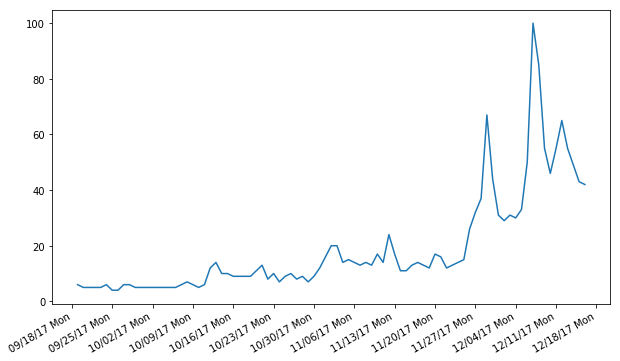

In [10]:
fig, ax = plt.subplots(1, )
fig.set_figheight(6)
fig.set_figwidth(10)
fig.autofmt_xdate()
ax.plot(buysell.index, buysell['buy bitcoin'])
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D %a')) 


In [11]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

(array([ 17424.,  17431.,  17438.,  17445.,  17452.,  17459.,  17466.,
         17473.,  17480.,  17487.,  17494.,  17501.,  17508.,  17515.]),
 <a list of 14 Text xticklabel objects>)

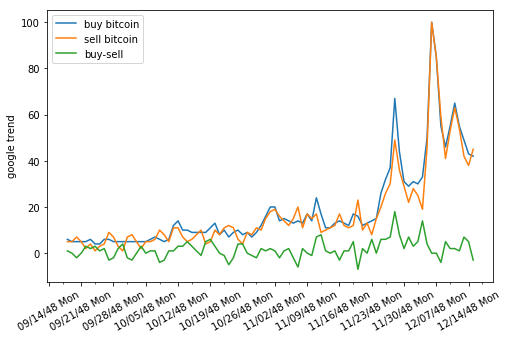

In [12]:
ax = buysell.plot(figsize=[8,5])
ax.set_ylabel('google trend')
ax.set_xlabel('')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D %a'))
plt.xticks(rotation=30)
#ax.set_xticklabels(ax.xaxis.get_ticklabels(), rotation=30)

## just some more plots.

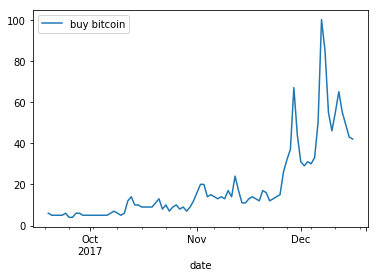

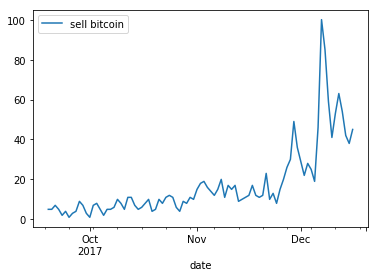

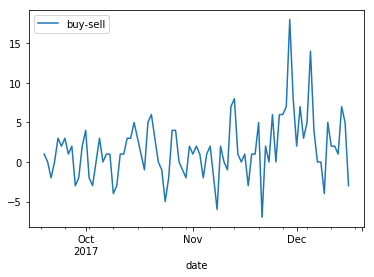

In [13]:
buysell.plot(y='buy bitcoin')
buysell.plot(y='sell bitcoin')
buysell.plot(y='buy-sell')

## seaborn allows some additional ease for various plotting
But we come up with known issues in seaborn having difficulty handling the timestamp information in the index, so this is failing. Whereas we were able to get around it by using matplotlib above.



In [14]:
import seaborn as sns
import pandas as pd

In [15]:
buysell.index = pd.to_datetime(buysell.index)

sns.lmplot generates error: ValueError: could not convert string to Timestamp

In [16]:
# sns.lmplot(x=buysell.index, y='buy bitcoin',  data=buysell)